# Analyze Bootstrapped standard errors from Notebook FG2010

In [1]:
import pandas
import matplotlib.pyplot as plt
import cPickle as pickle

execfile('gfe.py')

path = "C:\\Users\\sbordt\\Dropbox\\masterthesis\\csv\\FG2010\\"
picklepath = "C:\\Users\\sbordt\\Dropbox\\masterthesis\\python\\pickle\\"

In [15]:
def subgroup(ass_repl, ass):    
    a1 = np.array(ass_repl)
    a2 = np.array([1-v if v != -1 else -1 for v in ass_repl])   # 0 and 1 interchanged
    N = float(sum(a1 != -1))
    
    b = np.array([v if a1[i] != -1 else -1 for i, v in enumerate(ass)])   # -1 where ass_repl is -1
    
    error_1 = sum(a1 != b)/N
    error_2 = sum(a2 != b)/N
    
    if error_1 < error_2:
        return a1.tolist(), error_1
    
    return a2.tolist(), error_2

In [63]:
def best_group(ass_repl, ass):
    N = len(ass)
    
    n1 = sum([1 if ass_repl[i] == 1 and ass[i] == 0 else 0 for i in xrange(N)])   # 1 and 0
    n2 = sum([1 if ass_repl[i] == 1 and ass[i] == 1 else 0 for i in xrange(N)])   # 1 and 1 
    n3 = sum([1 if ass_repl[i] == 0 and ass[i] == 1 else 0 for i in xrange(N)])   # 0 and 1
    n4 = sum([1 if ass_repl[i] == 0 and ass[i] == 0 else 0 for i in xrange(N)])   # 0 and 0
    
    C1 = float(sum([1 if ass_repl[i] == 1 else 0 for i in xrange(N)]))
    C0 = float(sum([1 if ass_repl[i] == 0 else 0 for i in xrange(N)]))
    
    return np.max([n1/C1, n2/C1, n3/C0, n4/C0])
    
    #return [[C1, ], [], [], []][]


In [81]:
def groupings_relation(ass_repl, ass):
    N = len(ass)
    
    r0 = float(sum([1 if ass_repl[i] == 0 else 0 for i in xrange(N)]))   # number of 0s in repl  
    r1 = float(sum([1 if ass_repl[i] == 1 else 0 for i in xrange(N)]))   # number of 1s in repl  
    
    e1 = sum([1 if ass_repl[i] != -1 and ass_repl[i] != ass[i] else 0 for i in xrange(N)])
    e2 = sum([1 if ass_repl[i] != -1 and 1-ass_repl[i] != ass[i] else 0 for i in xrange(N)])
    
    if e1 <= e2:
        r0_o0 = sum([1 if ass_repl[i] == 0 and ass[i] == 0 else 0 for i in xrange(N)])   # repl 0 and original 0
        r1_o1 = sum([1 if ass_repl[i] == 1 and ass[i] == 1 else 0 for i in xrange(N)])   # repl 1 and original 1 
        i = np.argmax([r0_o0/r0, r1_o1/r1])
        
        return e1, ass_repl, [r0_o0/r0, r1_o1/r1][i], [0, 1][i]
             
    r1_o0 = sum([1 if ass_repl[i] == 1 and ass[i] == 0 else 0 for i in xrange(N)])   # repl 1 and original 0
    r0_o1 = sum([1 if ass_repl[i] == 0 and ass[i] == 1 else 0 for i in xrange(N)])   # repl 0 and original 1
    j = np.argmax([r0_o1/r0, r1_o0/r1])

    return e2, [1-ass_repl[i] if ass_repl[i] != -1 else -1 for i in xrange(N)], [r0_o1/r0, r1_o0/r1][j], [1, 0][j]

In [88]:
# test
print groupings_relation([-1, -1, -1, 1, 1, 0, 0, 0, -1, -1], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
print groupings_relation([-1, -1, -1, 0, 0, 1, 1, 1, -1, -1], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
print groupings_relation([-1, -1, -1, 1, 0, 1, 0, -1, -1, -1], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
print groupings_relation([-1, -1, -1, 1, 1, 1, 0, -1, -1, -1], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
print groupings_relation([-1, -1, -1, 0, 0, 0, 1, -1, -1, -1], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

(0, [-1, -1, -1, 1, 1, 0, 0, 0, -1, -1], 1.0, 0)
(0, [-1, -1, -1, 1, 1, 0, 0, 0, -1, -1], 1.0, 1)
(2, [-1, -1, -1, 1, 0, 1, 0, -1, -1, -1], 0.5, 0)
(1, [-1, -1, -1, 1, 1, 1, 0, -1, -1, -1], 1.0, 0)
(1, [-1, -1, -1, 1, 1, 1, 0, -1, -1, -1], 1.0, 0)


## Load data from all replications

In [114]:
bdata = {}

for case in["ALL", "NC", "CCNC", "TR"]:
    for var in ["betaHet", "alpha", "ass", "betaHet_repl", "ass_repl"]:
        bdata[var+case] = pickle.load( open(picklepath+var+case+".pkl", 'rb') )

## Analyze all at once

--------------------------------------------------------------------------
                                ALL
--------------------------------------------------------------------------


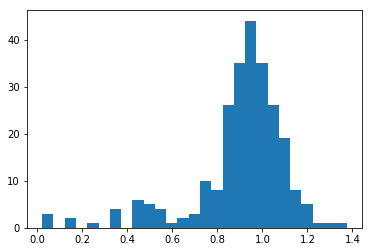

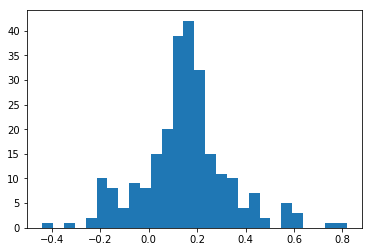

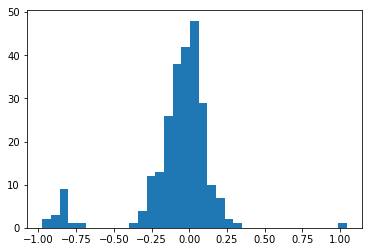

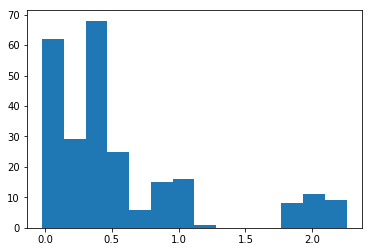

----- Group 1 -----
0.214490088811
0.243416618308
----- Group 2 -----
0.18125986875
0.594638922349
--------------------------------------------------------------------------
                                NC
--------------------------------------------------------------------------


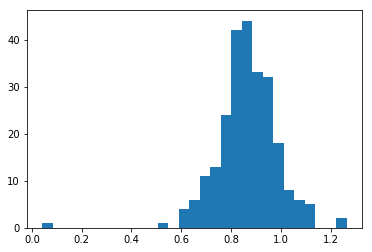

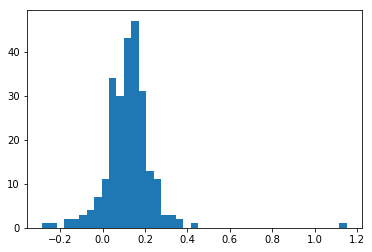

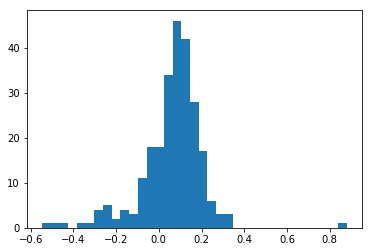

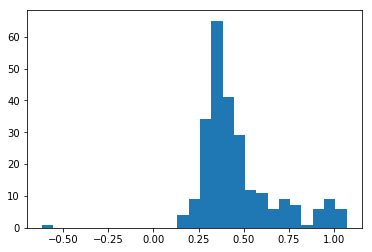

----- Group 1 -----
0.122649017284
0.145388206665
----- Group 2 -----
0.11604075735
0.214902783195
--------------------------------------------------------------------------
                                CCNC
--------------------------------------------------------------------------
[[ 0.062911    0.81983732]
 [-0.43991275  0.20479826]]


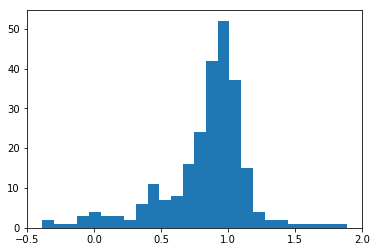

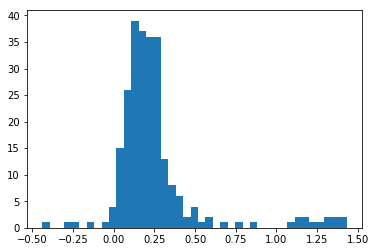

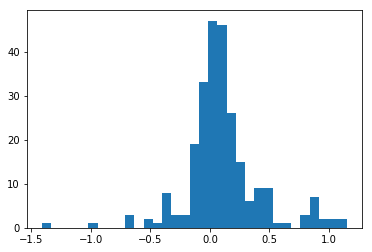

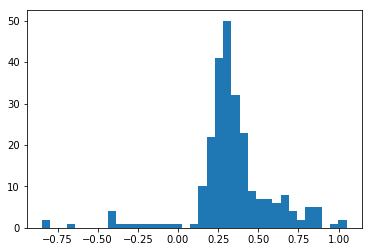

----- Group 1 -----
0.333924337116
0.319297228
----- Group 2 -----
0.274653834864
0.256187175247
--------------------------------------------------------------------------
                                TR
--------------------------------------------------------------------------
[[ 0.12733563 -0.29944578]
 [ 0.91135015  0.19610546]]
[[ 0.82733743  0.02515935]
 [ 0.90718678  0.09342781]]
[[ 0.95273934 -0.05585895]
 [ 0.88393642 -0.07555714]]
[[ 0.92183303  0.13532065]
 [ 2.21010461  1.86679391]]
[[ 0.64460076 -0.35537707]
 [ 0.93422499 -0.04992008]]
[[ 0.87424178  0.08517615]
 [ 0.921492    0.01378306]]
[[ 0.64612324  0.19845896]
 [ 1.88275828  2.41073749]]
[[ 0.9653535  -0.11889446]
 [ 0.74015184  0.15776559]]
[[ 0.89405075 -0.21618312]
 [ 0.85832259  0.00728473]]
[[ 0.97497478 -0.11665166]
 [ 0.71753788 -0.11429053]]
[[ 0.89981255 -0.08354993]
 [ 0.90492524  0.07391093]]
[[ 0.86620413  0.08564798]
 [ 0.45399393  0.3729551 ]]
[[ 0.18506886  0.00126718]
 [ 0.67720396  0.13235666]]
[[ 

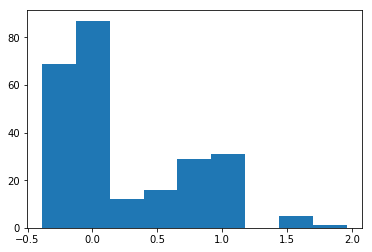

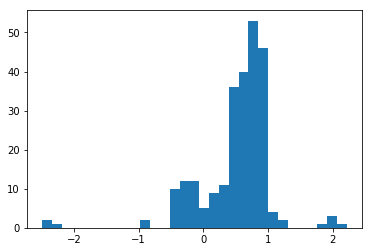

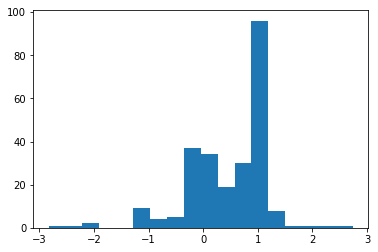

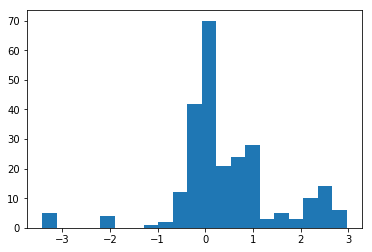

----- Group 1 -----
0.506765666039
0.729490176971
----- Group 2 -----
0.559687676156
1.0880512659


In [138]:
adata = {}

for case in["ALL", "NC", "CCNC", "TR"]:
    print "--------------------------------------------------------------------------"
    print "                                " + case
    print "--------------------------------------------------------------------------"
    
    betaHet = bdata["betaHet"+case]
    ass = bdata["ass"+case]
    
    belief_G1 = []
    belief_G2 = []
    predcont_G1 = []
    predcont_G2 = []
    
    for i in xrange(len(bdata["ass_repl"+case])):
        betaHet_repl = bdata["betaHet_repl"+case][i]
        ass_repl = bdata["ass_repl"+case][i]
        
        N = float(sum(np.array(ass_repl) != -1))
        error, ass_repl_switched, best_fit, best = groupings_relation(ass_repl, ass)
        
        d = abs((betaHet_repl[0][0]-betaHet_repl[0][1]) - (betaHet_repl[1][0]-betaHet_repl[1][1]))
        
        if d<1 and best_fit<0.9:   # it works well except for TR
            print betaHet_repl
            
        if ass_repl == ass_repl_switched:
            belief_G1.append(betaHet_repl[0][0])
            predcont_G1.append(betaHet_repl[0][1])
            belief_G2.append(betaHet_repl[1][0])
            predcont_G2.append(betaHet_repl[1][1])
        else:
            belief_G1.append(betaHet_repl[1][0])
            predcont_G1.append(betaHet_repl[1][1])
            belief_G2.append(betaHet_repl[0][0])
            predcont_G2.append(betaHet_repl[0][1])
    
    # output
    plt.hist(belief_G1, bins='auto')
    plt.show()
    
    plt.hist(belief_G2, bins='auto')
    plt.show()
    
    plt.hist(predcont_G1, bins='auto')
    plt.show()
    
    plt.hist(predcont_G2, bins='auto')
    plt.show()
    
    # method 1
    print "----- Group 1 -----"
    print np.sqrt(sum(pow(belief_G1-sum(belief_G1)/len(belief_G1),2))/(len(belief_G1)-1))
    print np.sqrt(sum(pow(predcont_G1-sum(predcont_G1)/len(predcont_G1),2))/(len(predcont_G1)-1))

    print "----- Group 2 -----"
    print np.sqrt(sum(pow(belief_G2-sum(belief_G2)/len(belief_G2),2))/(len(belief_G2)-1))
    print np.sqrt(sum(pow(predcont_G2-sum(predcont_G2)/len(predcont_G2),2))/(len(predcont_G2)-1))
    
    # save as txt
    txtG1 = ""
    txtG2 = ""
    
    for v in belief_G1:
        txtG1 = txtG1 + "%.6f\n" % v
    for v in belief_G2:
        txtG2 = txtG2 + "%.6f\n" % v

    open(path+"GFE\\bootstrap\\belief_G1_"+case+".txt", 'w').write(txtG1[:-1]) 
    open(path+"GFE\\bootstrap\\belief_G2_"+case+".txt", 'w').write(txtG2[:-1]) 
    open(path+"GFE\\bootstrap\\belief_"+case+".txt", 'w').write((txtG1+txtG2)[:-1])
    
    txtG1 = ""
    txtG2 = ""
    
    for v in predcont_G1:
        txtG1 = txtG1 + "%.6f\n" % v
    for v in predcont_G2:
        txtG2 = txtG2 + "%.6f\n" % v
        
    open(path+"GFE\\bootstrap\\predcont_G1_"+case+".txt", 'w').write(txtG1[:-1]) 
    open(path+"GFE\\bootstrap\\predcont_G2_"+case+".txt", 'w').write(txtG2[:-1]) 
    open(path+"GFE\\bootstrap\\predcont_"+case+".txt", 'w').write((txtG1+txtG2)[:-1])


['ass_replALL', 'betaHet_replALL', 'betaHetALL', 'alphaALL', 'assALL']


In [ ]:
    
for i, repl in enumerate(betaHet_replFR):
    # look at how groups align
    ass, error = subgroups(ass_replALL[i], assFR)
    if error > 0.2: 
        print error
        print repl
    
    if ass == ass_replFR[i]:
        bootstrap_g1_FR.append(repl[0][0])
        bootstrap_g2_FR.append(repl[1][0])  
    else:
        bootstrap_g1_FR.append(repl[1][0])
        bootstrap_g2_FR.append(repl[0][0]) 
        
# method 1
mean = sum(bootstrap_g1_FR)/len(bootstrap_g1_FR)
print np.sqrt(sum(pow(bootstrap_g1_FR-mean,2))/(len(bootstrap_g1_FR)-1))

mean = sum(bootstrap_g2_FR)/len(bootstrap_g2_FR)
print np.sqrt(sum(pow(bootstrap_g2_FR-mean,2))/(len(bootstrap_g2_FR)-1))

# method 2
print np.sqrt(sum(pow(np.array(bootstrap_g1_FR)-0.937,2))/(len(bootstrap_g1_FR)-1))
print np.sqrt(sum(pow(np.array(bootstrap_g2_FR)-0.183,2))/(len(bootstrap_g2_FR)-1))

In [32]:
print np.argmin([1,2,3,0])

3
